## 1.5-Supervised-learning-algorithms - decision tree - pt2
### The following script contains the following:

#### 1. Import data libraries, additional requirements
#### 2. Read scaled weather data
        - consistency checks
#### 3. Split training/testing data sets
#### 4. Run decision tree model
#### 5. Check decision tree test/training accuracy
#### 6. Check decision tree accuracy with confusion matrix
---------------------------------------------------------------------------------------------------------------------------

### 1. Import data libraries, additional requirements

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [2]:
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
path = r'ClimateWins'

------------------------------------------------------------------------------------------------------------------------
### 2. Read scaled weather data
        - consistency checks

In [4]:
#Read in the scaled weather data.
scaled = pd.read_csv(os.path.join(path, '02 Data Sets', 'Supervised', 'scaled_temp_mean_new.csv'))
scaled

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,19600101,1,-0.53,-1.02,-1.10,-0.11,-0.11,-0.11,-0.18,-1.37,-0.10,-0.99,-0.27,-0.19,-0.12,-0.39,-0.67
1,19600102,1,-0.58,-1.11,-1.11,-0.37,-0.37,-0.89,-0.21,-1.04,-0.23,-0.69,-0.35,-0.37,-0.65,-0.42,-0.55
2,19600103,1,-0.26,-1.08,-1.06,-0.51,-0.53,-0.49,-0.39,-0.74,-0.49,-0.85,-0.40,-0.55,-0.65,-0.62,-0.07
3,19600104,1,-0.56,-1.21,-1.15,-0.53,-0.58,-0.32,-0.49,-0.91,-0.47,-0.62,-0.64,-0.42,-0.94,-0.76,-1.00
4,19600105,1,-1.00,-1.21,-1.09,-0.32,-0.44,-0.40,-0.55,-0.86,-0.31,-0.38,-0.91,-0.33,-0.62,-0.50,-1.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,0.75,0.63,-0.01,0.90,1.04,0.91,-0.01,0.48,1.27,0.68,0.66,0.40,0.83,0.52,-0.01
22946,20221028,10,0.86,0.37,-0.01,0.95,1.28,0.80,-0.01,0.26,1.31,0.56,0.89,0.54,1.07,0.64,-0.01
22947,20221029,10,0.86,0.08,-0.01,0.91,1.10,0.92,-0.01,0.30,1.21,0.55,1.05,0.40,1.22,0.72,-0.01
22948,20221030,10,0.68,0.27,-0.01,0.69,0.88,0.70,-0.01,0.40,0.92,0.10,0.69,-0.07,1.24,0.02,-0.01


In [5]:
#Read in the scaled weather data.
answers = pd.read_csv(os.path.join(path, '02 Data Sets', 'Original Data', 'Weather_Prediction_Pleasant_Weather.csv'))
answers

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 3. Split training/testing data sets

In [6]:
#Create an 'X' matrix by dropping the unneeded columns.
X = scaled.drop(['DATE', 'MONTH'], axis=1)
y = answers.drop(['DATE'], axis=1)

In [7]:
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [8]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


------------------------------------------------------------------------------------------------------------------------
### 4. Run decision tree model

[Text(0.3789343489176084, 0.9848484848484849, 'x[8] <= 0.376\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.11547615820509123, 0.9545454545454546, 'x[9] <= -0.281\ngini = 0.1\nsamples = 10533\nvalue = [[9904, 629]\n[8963, 1570]\n[9386, 1147]\n[10387, 146]\n[10252, 281]\n[9925, 608]\n[10372, 161]\n[9675, 858]\n[10371, 162]\n[8015, 2518]\n[10179, 354]\n[10307, 226]\n[10533, 0]\n[10323, 210]\n[10376, 157]]'),
 Text(0.051292153450068566, 0.9242424242424242, 'x[2] <= 0.13\ngini = 0.036\nsamples = 7471\nvalue = [[7332.0, 139.0]\n[6811.0, 660.0]\n[7118.0, 353.0]\n[7426.0, 45.0]\n[7390.0, 81.0]\n[7407.0, 64.0]\n[7409.0, 62.0]\n[7243.0, 228.0]\n[7418.0, 53.0]\n[7252.0, 219.0]\n[7318.0, 153.0]\n[7435.0, 36.0]\n[7471.0, 0.0]\n[7438.0, 33.0]\n[7459.0, 12.0]]'),
 Text(0.0294508

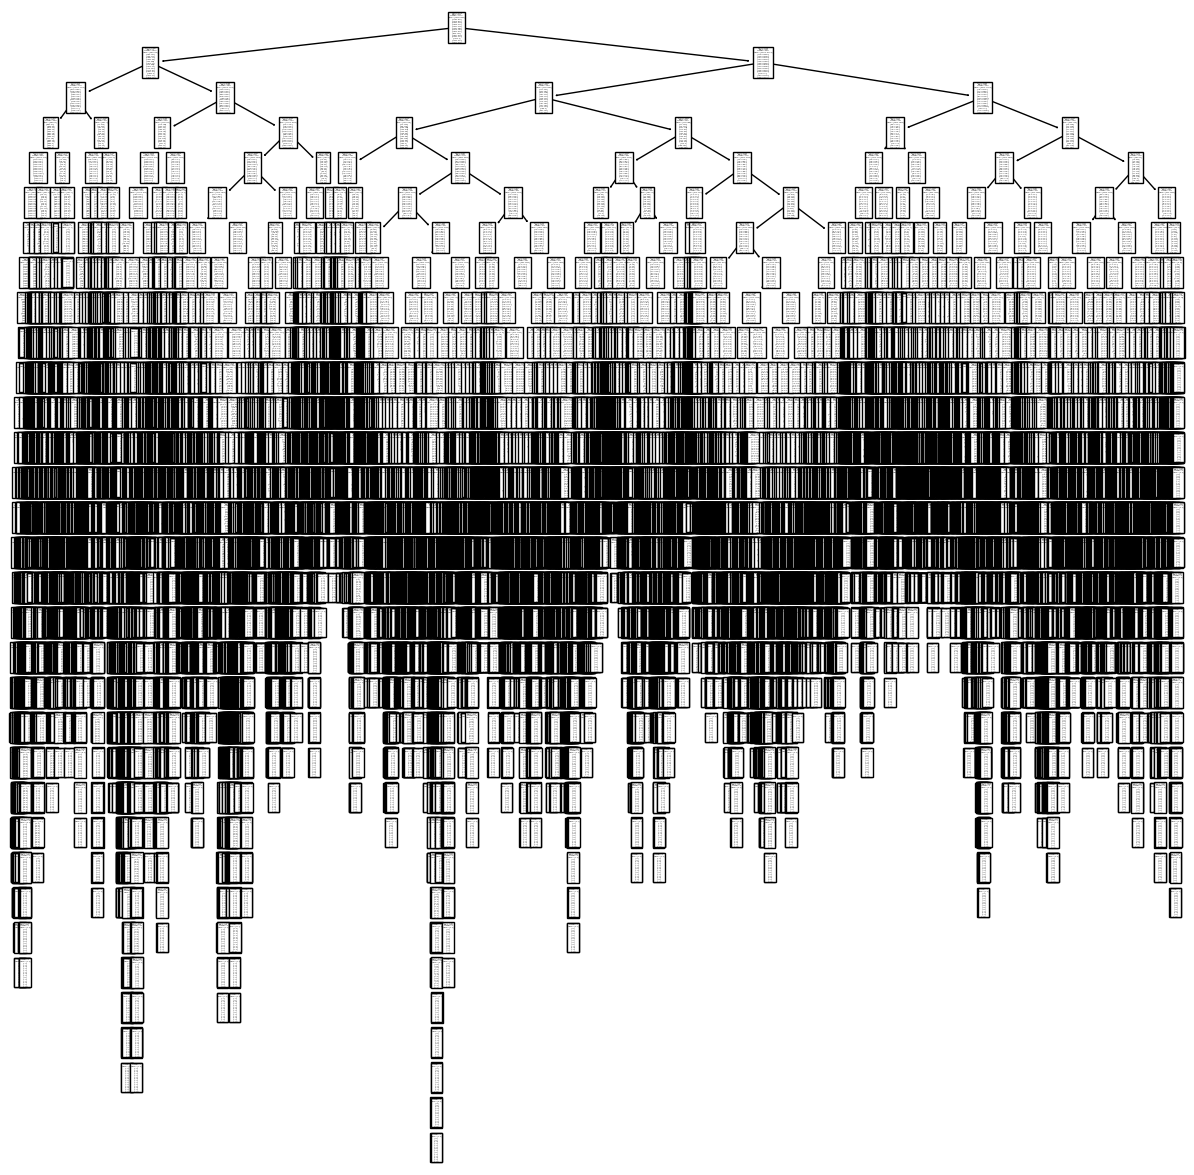

In [10]:
#Run Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(weather_dt)

------------------------------------------------------------------------------------------------------------------------
### 5. Check decision tree test/training accuracy

In [11]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = weather_dt.predict(X_train)
print('Train accuracy score: ', cross_val_score(weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())
multilabel_confusion_matrix(y_train, y_pred_train)

Train accuracy score:  0.3991400362251811


array([[[12948,     0],
        [    0,  4264]],

       [[11182,     0],
        [    0,  6030]],

       [[11619,     0],
        [    0,  5593]],

       [[13854,     0],
        [    0,  3358]],

       [[13509,     0],
        [    0,  3703]],

       [[13421,     0],
        [    0,  3791]],

       [[14361,     0],
        [    0,  2851]],

       [[12379,     0],
        [    0,  4833]],

       [[13622,     0],
        [    0,  3590]],

       [[ 9535,     0],
        [    0,  7677]],

       [[13637,     0],
        [    0,  3575]],

       [[14492,     0],
        [    0,  2720]],

       [[17212,     0],
        [    0,     0]],

       [[14290,     0],
        [    0,  2922]],

       [[16314,     0],
        [    0,   898]]], dtype=int64)

In [12]:
#What is the testing accuracy score? Using the cross validation method
y_pred = weather_dt.predict(X_test)
print('Test accuracy score: ', accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.4051934471941443


array([[[3735,  603],
        [ 555,  845]],

       [[3143,  633],
        [ 622, 1340]],

       [[3339,  561],
        [ 578, 1260]],

       [[4142,  495],
        [ 459,  642]],

       [[3963,  544],
        [ 555,  676]],

       [[3945,  625],
        [ 558,  610]],

       [[4397,  418],
        [ 421,  502]],

       [[3563,  632],
        [ 542, 1001]],

       [[4069,  493],
        [ 495,  681]],

       [[2675,  493],
        [ 522, 2048]],

       [[4032,  514],
        [ 518,  674]],

       [[4473,  406],
        [ 372,  487]],

       [[5738,    0],
        [   0,    0]],

       [[4381,  385],
        [ 386,  586]],

       [[5257,  205],
        [ 202,   74]]], dtype=int64)

In [13]:
#Calculate and print accuracy score for each weather station (y_test)
confusion_matrices = np.array([
    [[3730, 608], [568, 832]],
    [[3145, 631], [641, 1321]],
    [[3322, 578], [566, 1272]],
    [[4132, 505], [467, 634]],
    [[3942, 565], [537, 694]],
    [[3928, 642], [533, 635]],
    [[4402, 413], [396, 527]],
    [[3568, 627], [572, 971]],
    [[4051, 511], [482, 694]],
    [[2687, 481], [527, 2043]],
    [[4064, 482], [508, 684]],
    [[4476, 403], [369, 490]],
    [[5738, 0], [0, 0]],
    [[4395, 371], [376, 596]],
    [[5246, 216], [200, 76]]
])

accuracy_scores = []

for matrix in confusion_matrices:
    tn, fp = matrix[0]
    fn, tp = matrix[1]
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracy_scores.append(accuracy)

print("Accuracy scores for each group:")
for i, accuracy in enumerate(accuracy_scores):
    print(f"Group {i + 1}: {accuracy:.4f}")

Accuracy scores for each group:
Group 1: 0.7951
Group 2: 0.7783
Group 3: 0.8006
Group 4: 0.8306
Group 5: 0.8079
Group 6: 0.7952
Group 7: 0.8590
Group 8: 0.7910
Group 9: 0.8269
Group 10: 0.8243
Group 11: 0.8275
Group 12: 0.8655
Group 13: 1.0000
Group 14: 0.8698
Group 15: 0.9275


------------------------------------------------------------------------------------------------------------------------
### 6. Check decision tree accuracy with confusion matrix

In [14]:
#Use a multilabel confusion matrix to plot all 15 matrices at once
locations = list({x.split("_")[0] for x in scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

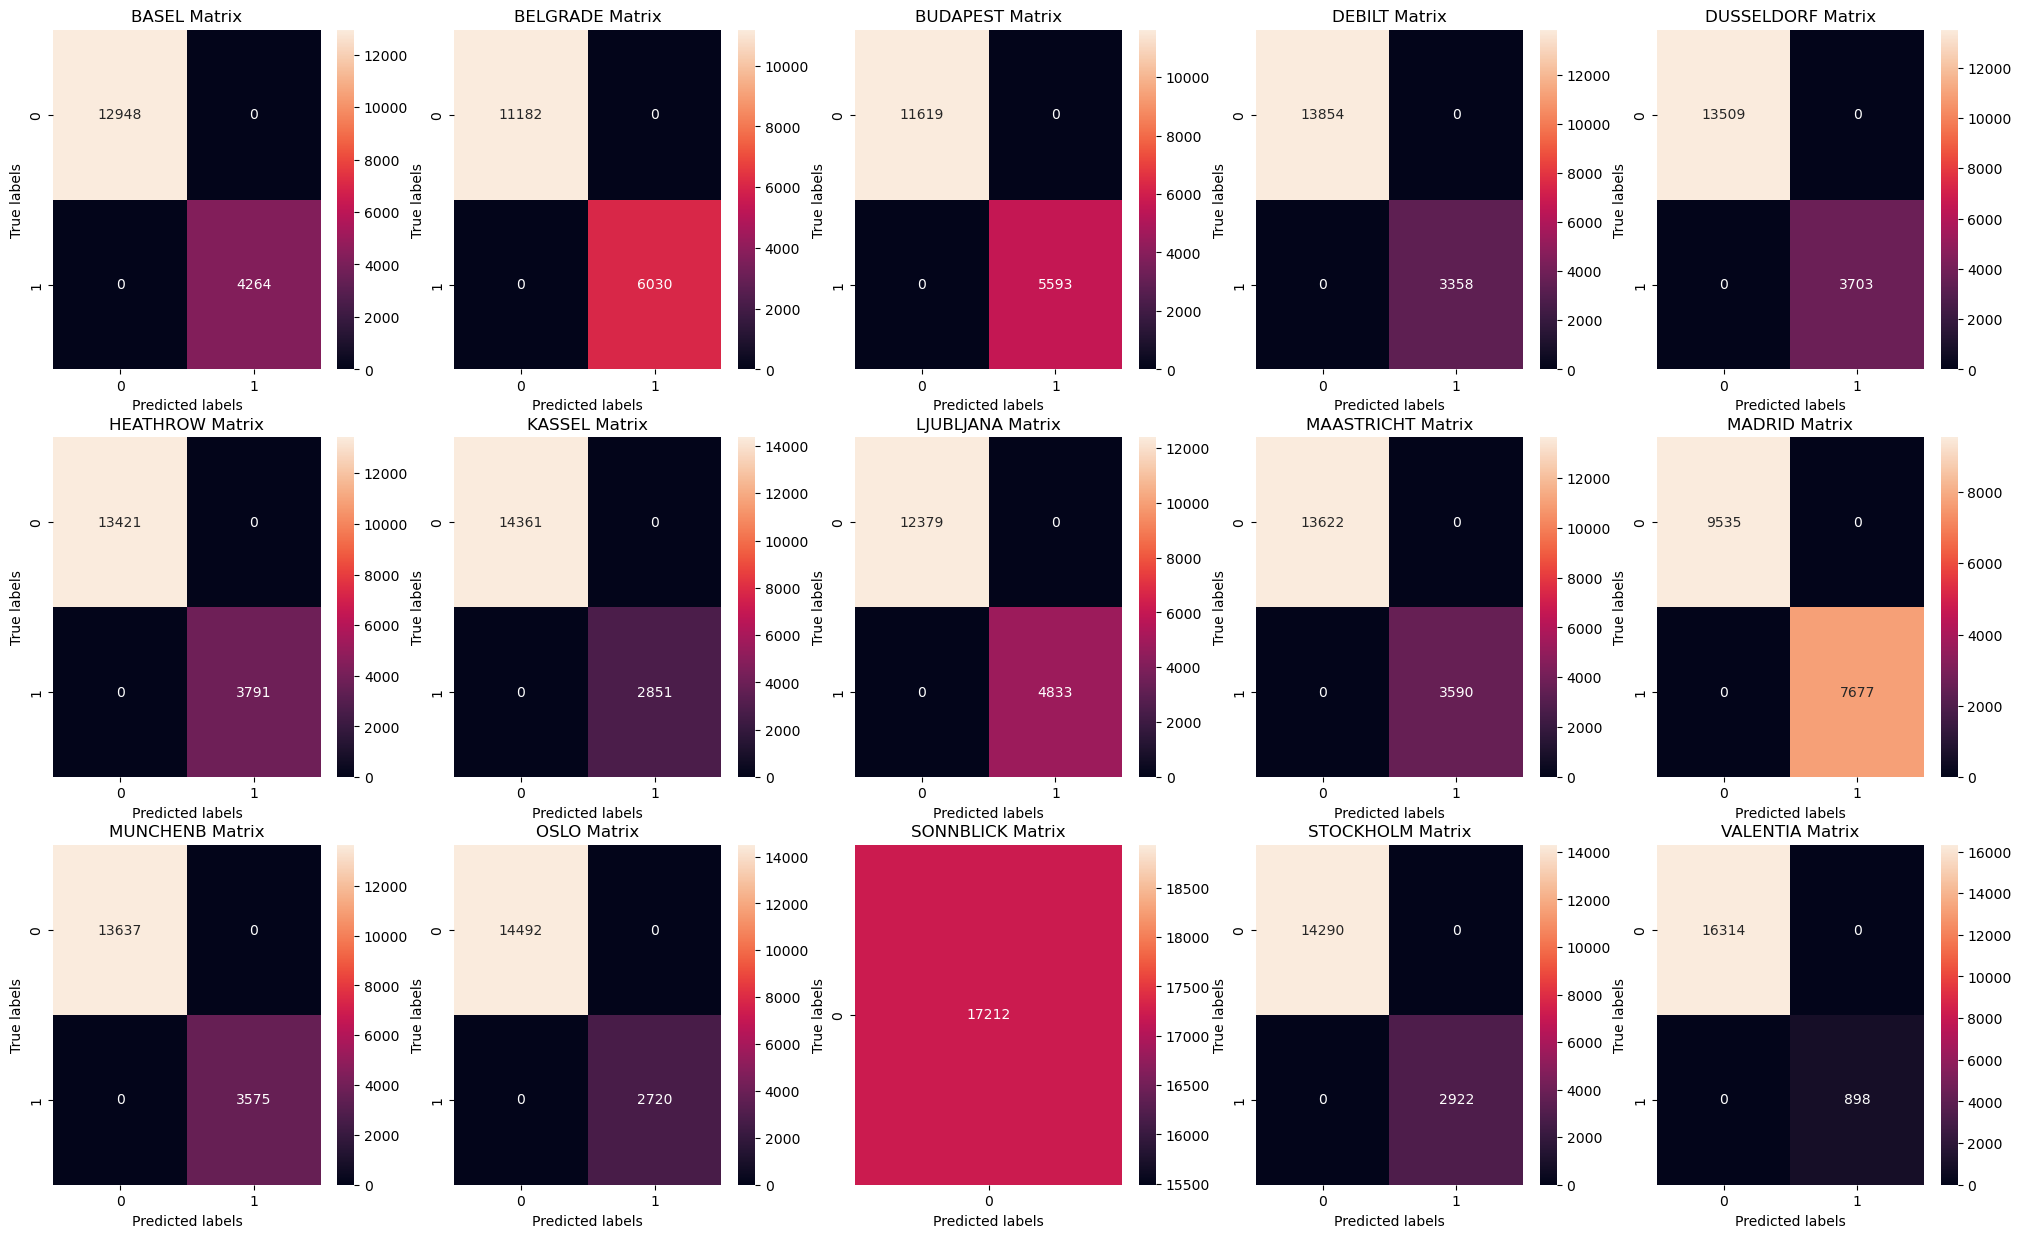

In [15]:
#Plot multilabel confusion matrix for (training accuracy score)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data.
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

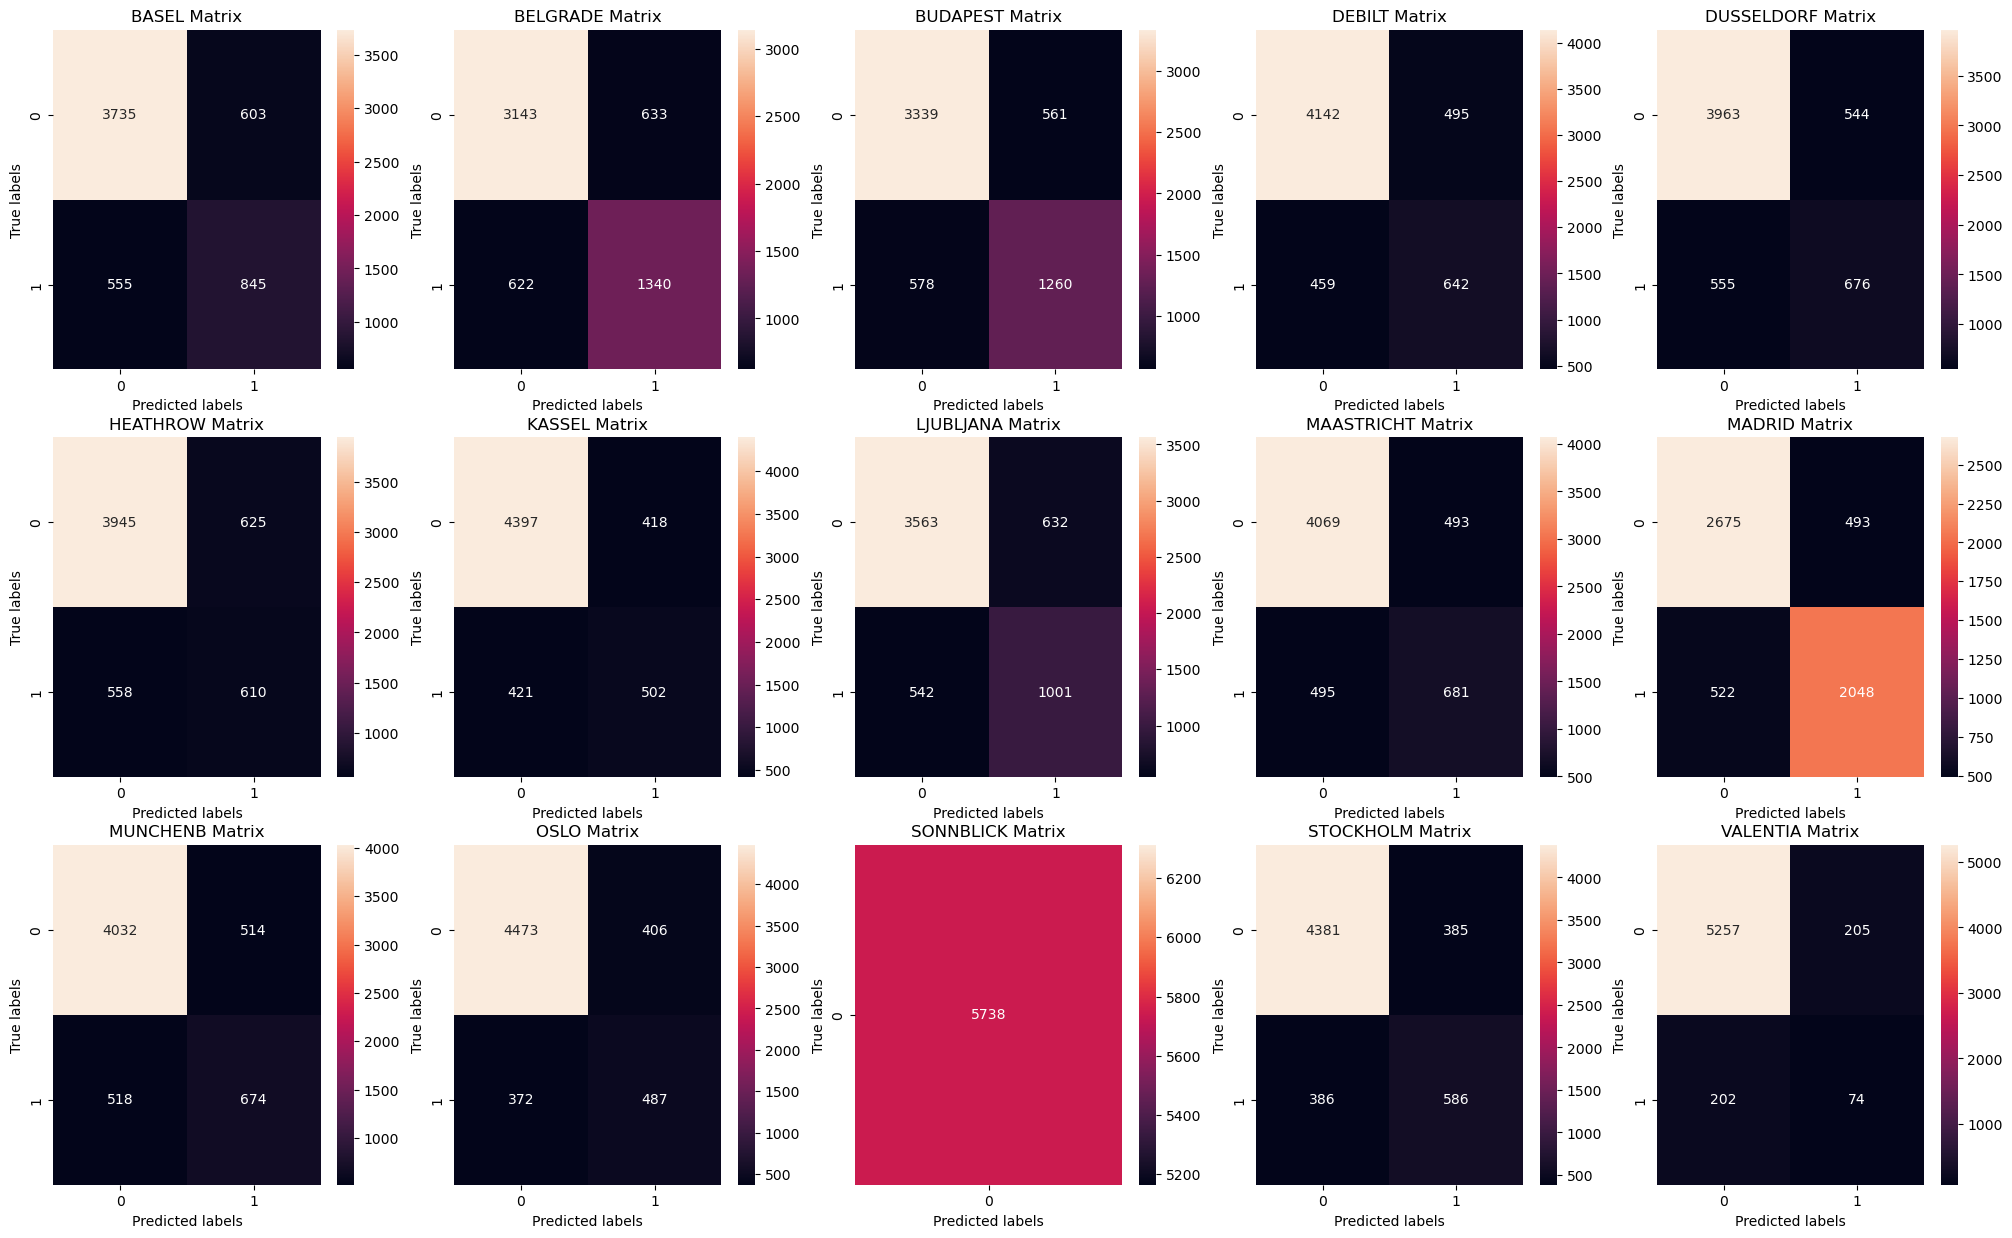

In [16]:
#Plot multilabel confusion matrix (test accuracy score)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [21]:
#Print classification_report
print(classification_report(y_test, y_pred, target_names=['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']))

                      precision    recall  f1-score   support

     BASEL_temp_mean       0.58      0.60      0.59      1400
  BELGRADE_temp_mean       0.68      0.68      0.68      1962
  BUDAPEST_temp_mean       0.69      0.69      0.69      1838
    DEBILT_temp_mean       0.56      0.58      0.57      1101
DUSSELDORF_temp_mean       0.55      0.55      0.55      1231
  HEATHROW_temp_mean       0.49      0.52      0.51      1168
    KASSEL_temp_mean       0.55      0.54      0.54       923
 LJUBLJANA_temp_mean       0.61      0.65      0.63      1543
MAASTRICHT_temp_mean       0.58      0.58      0.58      1176
    MADRID_temp_mean       0.81      0.80      0.80      2570
  MUNCHENB_temp_mean       0.57      0.57      0.57      1192
      OSLO_temp_mean       0.55      0.57      0.56       859
 SONNBLICK_temp_mean       0.00      0.00      0.00         0
 STOCKHOLM_temp_mean       0.60      0.60      0.60       972
  VALENTIA_temp_mean       0.27      0.27      0.27       276

      

------------------------------------------------------------------------------------------------------------------------
